## Assignment

- Start a new notebook.
- Choose a Wikipedia page to forecast, and get the data.
- Begin with baselines for time series.
- Use the Prophet library to forecast pageviews for the Wikipedia page you chose. 
- Plot your forecast and share it on Slack.
- Commit your notebook to your fork of the GitHub repo.

### Stretch Challenges
- [Get daily weather station data](https://www.ncdc.noaa.gov/cdo-web/search) from the NOAA (National Oceanic and Atmospheric Administration). User Prophet to forecast the weather for your local area. 
- Adjust your forecasts with Prophet's [changepoints](https://facebook.github.io/prophet/docs/trend_changepoints.html) and [holidays](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) options. In addition to Prophet's documentation, read Will Koehrsen's blog post, [Time Series Analysis in Python](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a).
- Learn more about how Prophet works. Read the [tweestorm with animated GIFs](https://twitter.com/seanjtaylor/status/1123278380369973248) by Prophet developer Sean J. Taylor, or his [research paper](https://peerj.com/preprints/3190/).

In [1]:
import requests as r

https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews#Quick_start

In [107]:
page = 'Bitcoin' #page name
freq = 'daily' #daily or monthly
start = '2010123100' #yearmody00
end = '2019042300'
wiki_api = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents'

url = wiki_api+'/'+page+'/'+freq+'/'+start+'/'+end

In [108]:
req = r.get(url)

In [128]:
import pandas as pd
import numpy as np

In [129]:
json = req.json() #req is a request object
df = pd.DataFrame(json['items']) #json was a returned in dictionary format.

http://strftime.org/

In [130]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H') #%H = HR  (hour)

In [131]:
df.tail(1)

,access,agent,article,granularity,project,timestamp,views
1392,all-access,all-agents,Bitcoin,daily,en.wikipedia,2019-04-23,7817


In [132]:
df_clean = df.set_index('timestamp')
df_clean = df_clean[['views']]

start = '2015-07-01'
end = '2019-04-23'
future = '2019-12-31'
df_clean = df_clean.reindex(pd.date_range(start=start, end=future))
df_clean.tail(2)

,views
2019-12-30,NaN
2019-12-31,NaN


In [133]:
df_clean['Mean_Baseline'] = df_clean['views'].mean()
df_clean['Naive_Baseline'] = df_clean['views'].ffill() #why shift????

df_clean['Drift Baseline'] = np.nan
df_clean.loc[start, 'Drift Baseline'] = df_clean.loc[start, 'views']
df_clean.loc[end, 'Drift Baseline'] = df_clean.loc[end, 'views']
df_clean['Drift Baseline'] = df_clean['Drift Baseline'].interpolate(limit_area='inside')

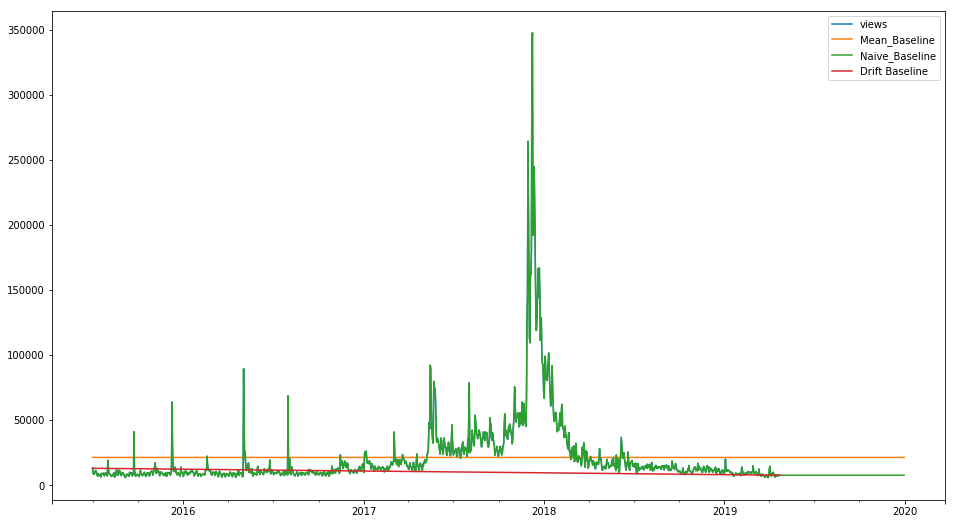

In [134]:
df_clean.plot(figsize=(16,9))

https://facebook.github.io/prophet/docs/quick_start.html#python-api

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [136]:
columns = ['timestamp', 'views']
df_prophet = df[columns]
df_prophet = df_prophet.rename(columns={'views': 'y', 'timestamp': 'ds'})

In [137]:
df_prophet.head(2)

,ds,y
0,2015-07-01,13137
1,2015-07-02,9938


In [147]:
from fbprophet import Prophet

In [149]:
m = Prophet(daily_seasonality=True)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

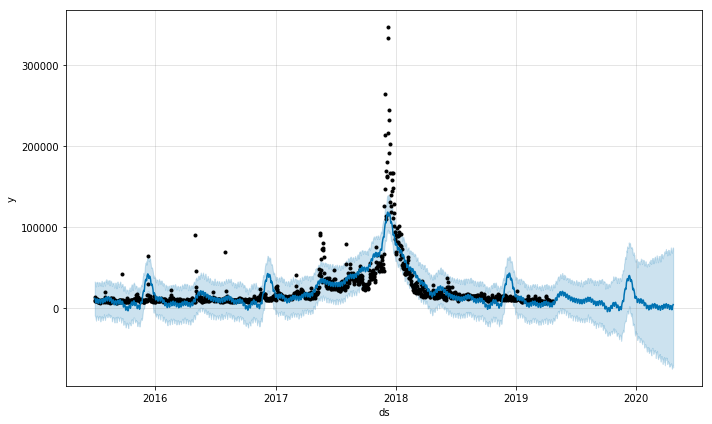

In [150]:
fig1 = m.plot(forecast)

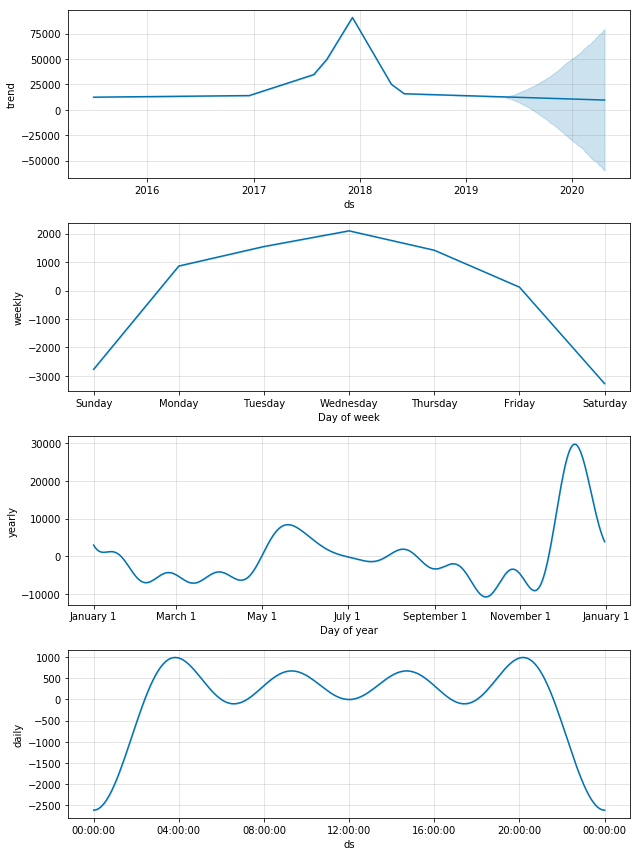

In [151]:
fig2 = m.plot_components(forecast)